<a href="https://colab.research.google.com/github/sabriades/Machine_Learning_Model/blob/main/RF_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import pandas as pd
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import learning_curve, ShuffleSplit
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

Saving NANOCOMPOSITES_DATASET_HERE_2ND.csv to NANOCOMPOSITES_DATASET_HERE_2ND.csv


In [3]:
nanocomposites=pd.read_csv('NANOCOMPOSITES_DATASET_HERE_2ND.csv')
nanocomposites.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Filler Geometry,Elastic Modulus matrix (MPa),Paper
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,Graphene nanoplatelets (GNP),3554.7,26
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,Graphene nanoplatelets (GNP),3554.7,26
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,multi-walled carbon nanotubes (MWCNT),3554.7,26


In [4]:
nanocomposites=nanocomposites.drop(['Paper','Filler Geometry'], axis=1)

In [ ]:
nanocomposites.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,3554.7
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,3554.7
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,3554.7


In [5]:
nanocomposites.describe() #metodo

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,3.840598,2587.492821,48.423333,5.775812,2126.176667
std,4.757838,1224.501475,22.025183,6.078592,768.148047
min,0.100000,23.930000,13.000000,0.760000,19.590000
25%,1.000000,1780.000000,33.100000,2.900000,1668.000000
50%,2.000000,2561.300000,41.400000,4.000000,2159.800000
75%,5.000000,3300.000000,68.900000,6.500000,2467.200000
max,30.000000,7362.000000,94.790000,38.500000,3782.000000


In [6]:
nanocomposites_encoded=pd.get_dummies(nanocomposites)
nanocomposites_encoded.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,...,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3722.4,74.2,4.4,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.4,3407.2,71.1,6.2,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.2,3654.5,72.4,6.9,3554.7,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [7]:
nanocomposites.shape #righe e colonne

(117, 7)

In [8]:
nanocomposites_encoded.shape

(117, 21)

In [9]:
nanocomposites_encoded.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,...,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3722.4,74.2,4.4,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.4,3407.2,71.1,6.2,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.2,3654.5,72.4,6.9,3554.7,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


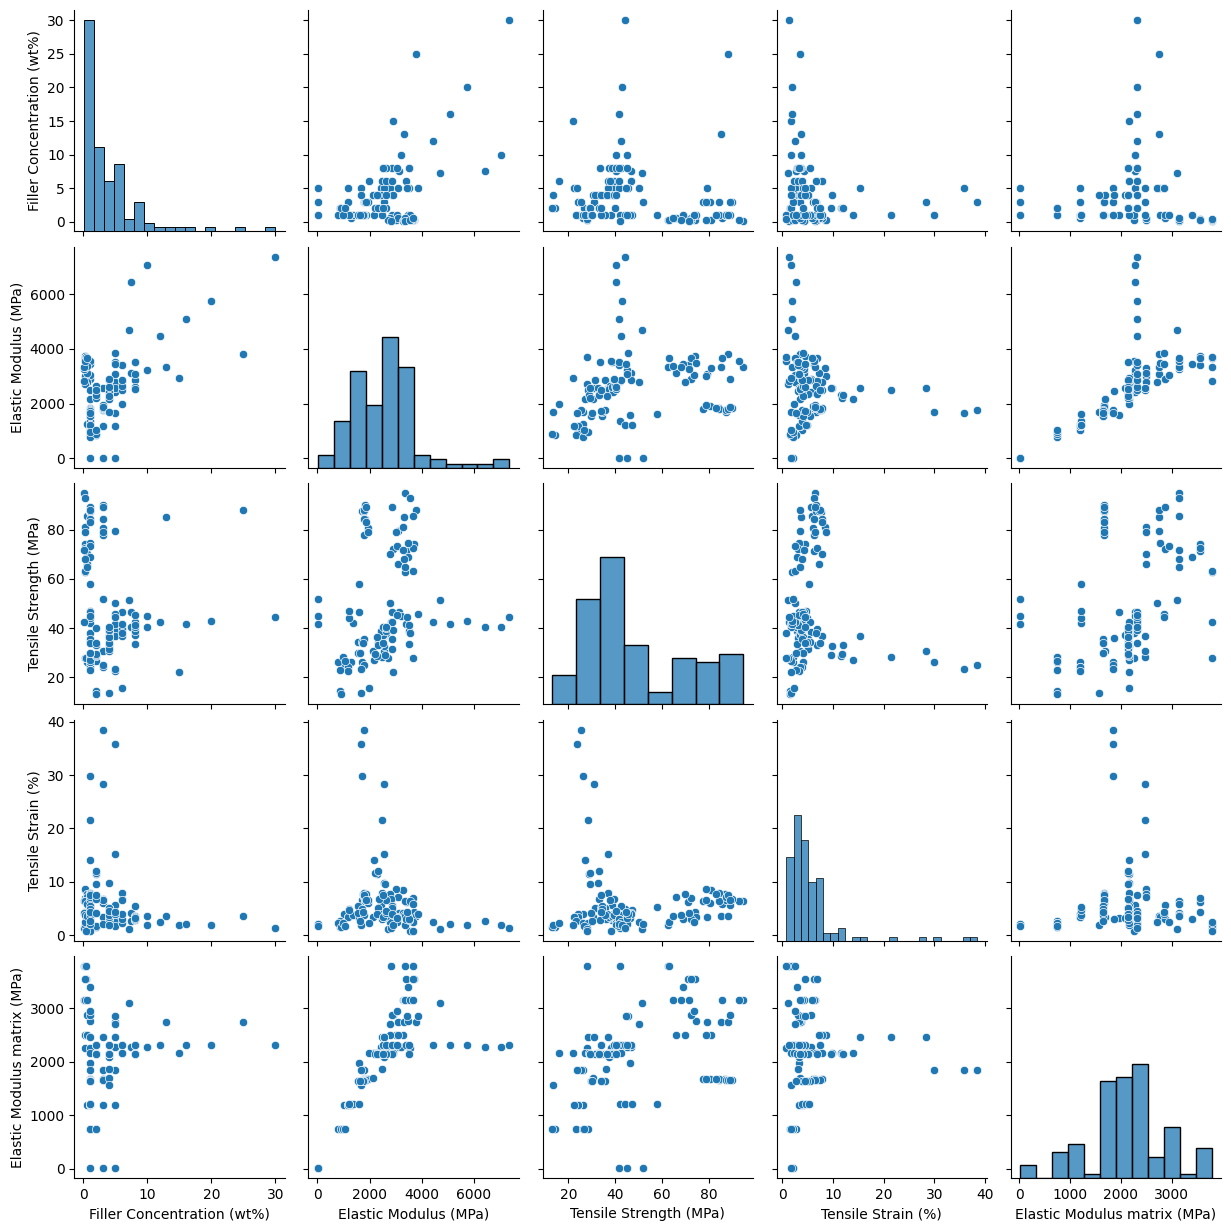

In [ ]:
sns.pairplot(nanocomposites)

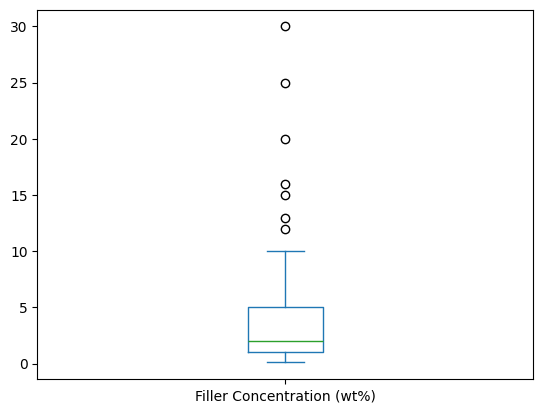

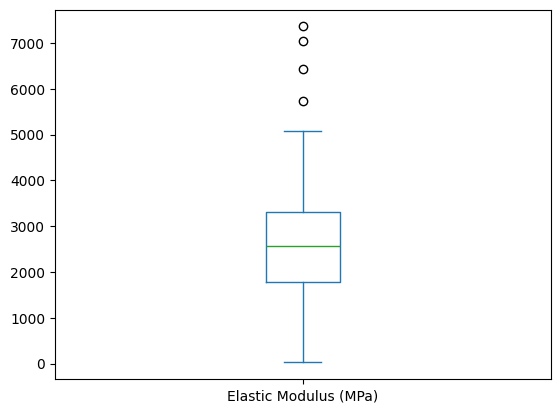

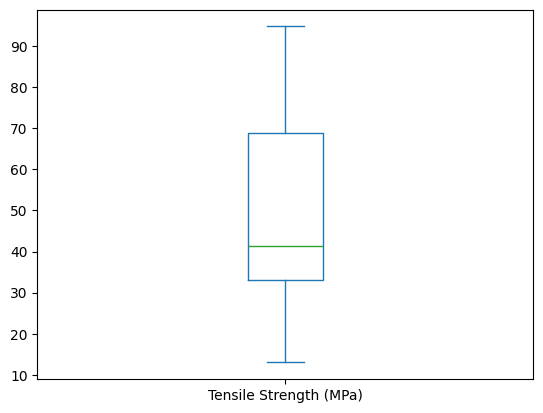

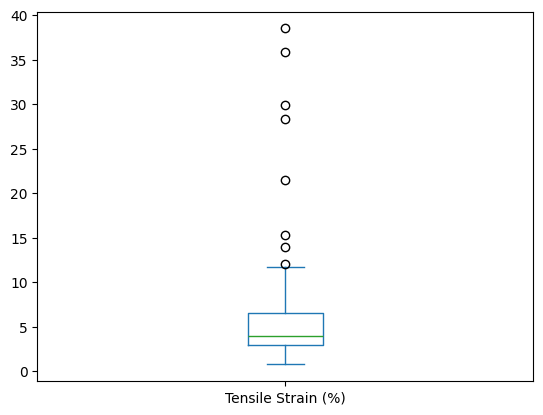

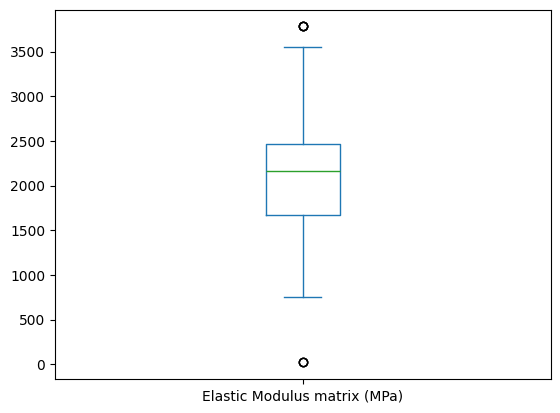

In [10]:
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler']:
    nanocomposites[[colonna]].plot(kind='box')

In [ ]:
outliers_dict={}
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler']:
    Q1=nanocomposites[colonna].quantile(0.25)
    Q3=nanocomposites[colonna].quantile(0.75)
    IQR=Q3-Q1
    limite_basso=Q1- 1.5*IQR
    limite_alto=Q3+1.5*IQR
    outliers_colonna=nanocomposites[(nanocomposites[colonna]<limite_basso) | (nanocomposites[colonna]>limite_alto)]
    outliers_dict[colonna] = outliers_colonna

In [ ]:
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler', 'Tensile Strength (MPa)']:
    print("outliers di: "+colonna)
    display(outliers_dict[colonna])

outliers di: Filler Concentration (wt%)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
18,Epoxy,Nanosilica,13.0,3330.0,85.25,3.62,2750.0
19,Epoxy,Nanosilica,25.0,3800.0,88.11,3.52,2750.0
81,ABS,MWCNT,15.0,2917.3,22.00,1.80,2159.8
107,ABS,GNP,12.0,4450.0,42.40,2.50,2315.0
108,ABS,GNP,16.0,5072.0,41.60,2.00,2315.0
109,ABS,GNP,20.0,5725.0,42.90,1.90,2315.0
110,ABS,GNP,30.0,7362.0,44.30,1.30,2315.0


outliers di: Elastic Modulus (MPa)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
15,ABS,SWCNT,7.5,6434.0,40.5,2.6,2278.0
16,ABS,SWCNT,10.0,7045.0,40.3,1.8,2278.0
109,ABS,GNP,20.0,5725.0,42.9,1.9,2315.0
110,ABS,GNP,30.0,7362.0,44.3,1.3,2315.0


outliers di: Tensile Strain (%)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
44,PET,TiO₂,1.0,2486.1,28.30,21.50,2467.2
45,PET,TiO₂,3.0,2561.3,30.70,28.30,2467.2
46,PET,TiO₂,5.0,2572.8,36.90,15.30,2467.2
47,PLA,TiO₂,1.0,1710.0,26.33,29.86,1840.0
48,PLA,TiO₂,3.0,1780.0,25.14,38.50,1840.0
49,PLA,TiO₂,5.0,1660.0,23.47,35.82,1840.0
76,ABS,MWCNT,1.0,2169.1,26.90,14.00,2159.8
94,ABS,GNP,2.0,2312.0,33.10,12.00,2147.0


outliers di: Elastic Modulus matrix (MPa)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
40,Epoxy,MWCNT,0.1,2823.00,42.24,1.40,3782.00
41,Epoxy,MWCNT,0.2,3345.00,62.56,1.96,3782.00
42,Epoxy,MWCNT,0.3,3680.00,63.04,2.52,3782.00
43,Epoxy,MWCNT,0.4,3684.00,28.00,0.76,3782.00
50,PET,Clay,1.0,23.93,45.00,2.07,19.59
51,PET,Clay,3.0,28.14,51.79,2.01,19.59
52,PET,Clay,5.0,25.89,41.55,1.73,19.59


In [11]:
X=nanocomposites_encoded[['Filler Concentration (wt%)', 'Elastic Modulus matrix (MPa)','Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PET', 'Polymer Matrix_PLA',
       'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS',
       'Filler_GO', 'Filler_MWCNT', 'Filler_Nanosilica', 'Filler_SWCNT',
       'Filler_Silica', 'Filler_TiO₂', 'Filler_h-BN', 'Filler_rGO']]
y=nanocomposites_encoded[['Elastic Modulus (MPa)', 'Tensile Strength (MPa)', 'Tensile Strain (%)']]
X.head(3)

,Filler Concentration (wt%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,Filler_Clay,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3554.7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,0.4,3554.7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,0.2,3554.7,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
y.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
0,3722.4,74.2,4.4
1,3407.2,71.1,6.2
2,3654.5,72.4,6.9


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42) #20% delle osservazioni nel testing set

In [ ]:
len(y_test)

24

In [ ]:
len(y_train)

93

In [13]:
model=RandomForestRegressor(n_estimators=500,max_features='sqrt', random_state=42, oob_score=True)

In [14]:
rf=model.fit(X_train,y_train)

In [15]:
rf.oob_score_ #80%

0.802079746316684

In [16]:
pred_properties=rf.predict(X_test)

In [17]:
mae=mean_absolute_error(y_true=y_test, y_pred=pred_properties)
print('MAE: '+str(mae))

MAE: 91.39707907698062


In [18]:
mse=mean_squared_error(y_true=y_test, y_pred=pred_properties)
rmse=math.sqrt(mse)
print('RMSE: '+str(rmse))

RMSE: 189.66239131845126


In [19]:
r2=rf.score(X_test, y_test)
print('R2:'+str(r2)) #con test_size=0.15 aumenta a 84% tuttavia peggiora per abs+gnp

R2:0.820667674526259


In [ ]:
y_train_pred=model.predict(X_train)
train_score=r2_score(y_train, y_train_pred)
y_test_pred=model.predict(X_test)
test_score=r2_score(y_test, y_test_pred)
mse_test=mean_squared_error(y_true=y_test, y_pred=y_test_pred)
rmse_test=math.sqrt(mse_test)
mse_train=mean_squared_error(y_true=y_train, y_pred=y_train_pred)
rmse_train=math.sqrt(mse_train)
mae_test=mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
mae_train=mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
print("Train R2:", train_score)
print("Test R2:", test_score)
print("Test RMSE:", rmse_test)
print("Train RMSE:", rmse_train)
print("Test MAE:", mae_test)
print("Train MAE:", mae_train)

Train R2: 0.9617367986698344
Test R2: 0.820667674526259
Test RMSE: 189.66239131845126
Train RMSE: 131.37482454782983
Test MAE: 91.39707907698062
Train MAE: 50.60420986790848


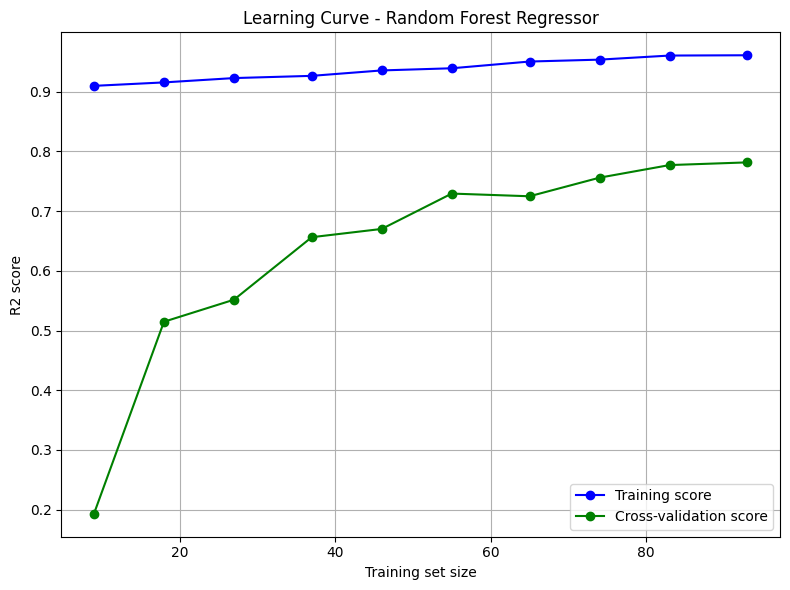

In [31]:
#cross validation con shuffle split
cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=42)

#calcolo della learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=cv, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

#grafico
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.title('Learning Curve - Random Forest Regressor')
plt.xlabel('Training set size')
plt.ylabel('R2 score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
pred_properties_df=pd.DataFrame(pred_properties, columns=y_test.columns, index=y_test.index)
pred_properties_df
pred_properties_df.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
44,2501.564630,38.569440,19.526895
4,1276.411430,26.566553,4.054640
53,3387.417667,89.559873,6.207021


In [22]:
for colonna in pred_properties_df:
  mae_each_target=mean_absolute_error(y_true=y_test[colonna], y_pred=pred_properties_df[colonna])
  mse_each_target=mean_squared_error(y_true=y_test[colonna], y_pred=pred_properties_df[colonna])
  rmse_each_target=math.sqrt(mse_each_target)
  r2_each_target=r2_score(y_true=y_test[colonna], y_pred=pred_properties_df[colonna])
  print('Colonna: '+colonna)
  print('MAE di '+colonna+' : '+str(mae_each_target))
  print('RMSE di '+colonna+' : '+str(rmse_each_target))
  print('R2 di '+colonna+' : '+str(r2_each_target))

Colonna: Elastic Modulus (MPa)
MAE di Elastic Modulus (MPa) : 267.33644775072287
RMSE di Elastic Modulus (MPa) : 328.39662242970525
R2 di Elastic Modulus (MPa) : 0.8133825781802959
Colonna: Tensile Strength (MPa)
MAE di Tensile Strength (MPa) : 5.625711786856708
RMSE di Tensile Strength (MPa) : 8.228676499238436
R2 di Tensile Strength (MPa) : 0.8288484024737893
Colonna: Tensile Strain (%)
MAE di Tensile Strain (%) : 1.2290776933621907
RMSE di Tensile Strain (%) : 1.8480534982764456
R2 di Tensile Strain (%) : 0.8197720429246917


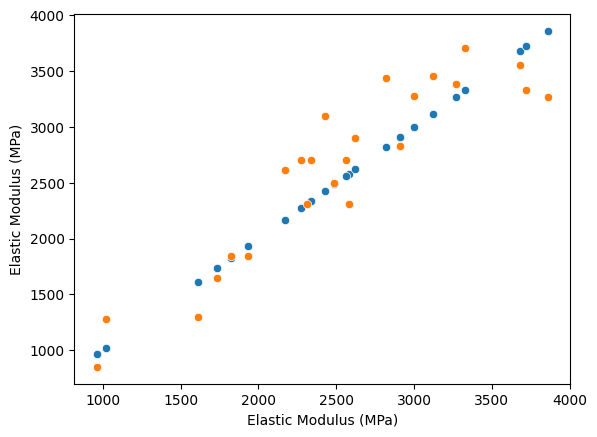

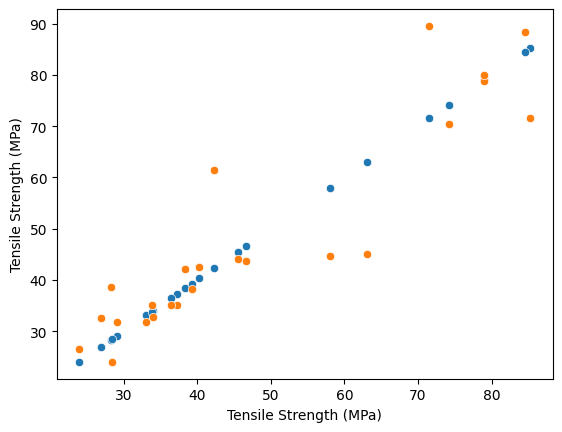

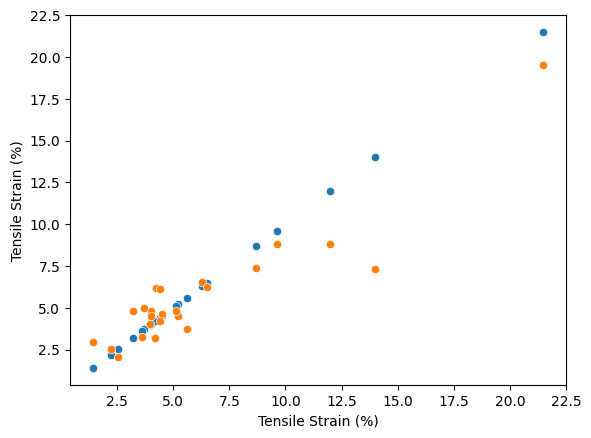

In [28]:
for colonna in pred_properties_df:
  fix,ax=plt.subplots()
  sns.scatterplot(x=y_test[colonna],y=y_test[colonna], ax=ax)
  sns.scatterplot(x=y_test[colonna],y=pred_properties_df[colonna], ax=ax)

valuto solo le performance sui campioni ABS+GNP

In [23]:
mask_abs_gnp=(X_test["Polymer Matrix_ABS"]==1) & (X_test["Filler_GNP"]==1)

In [24]:
X_test_abs_gnp=X_test[mask_abs_gnp]
y_test_abs_gnp=y_test.loc[mask_abs_gnp]

In [ ]:
X_test_abs_gnp.head(3)

,Filler Concentration (wt%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,Filler_Clay,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
85,2.0,2147.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
72,4.0,2080.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
94,2.0,2147.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
y_test_abs_gnp.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
85,2582.0,29.1,9.6
72,2563.0,37.3,3.2
94,2312.0,33.1,12.0


In [25]:
y_pred_abs_gnp=model.predict(X_test_abs_gnp)

In [26]:
y_pred_abs_gnp_df=pd.DataFrame(y_pred_abs_gnp, columns=y_test_abs_gnp.columns, index=y_test_abs_gnp.index)
y_pred_abs_gnp_df.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
85,2312.598596,31.776438,8.796554
72,2703.076822,35.200045,4.813919
94,2312.598596,31.776438,8.796554


In [27]:
mae=mean_absolute_error(y_test_abs_gnp,y_pred_abs_gnp)
rmse=np.sqrt(mean_squared_error(y_test_abs_gnp,y_pred_abs_gnp))
r2=r2_score(y_test_abs_gnp,y_pred_abs_gnp)
print("Valutazione SOLO su ABS+GNP:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Valutazione SOLO su ABS+GNP:
MAE: 82.78595357683976
RMSE: 180.0846558300954
R2: 0.7877526162077292


In [29]:
for colonna in y_pred_abs_gnp_df:
  mae_each_target=mean_absolute_error(y_true=y_test_abs_gnp[colonna], y_pred=y_pred_abs_gnp_df[colonna])
  mse_each_target=mean_squared_error(y_true=y_test_abs_gnp[colonna], y_pred=y_pred_abs_gnp_df[colonna])
  rmse_each_target=math.sqrt(mse_each_target)
  r2_each_target=r2_score(y_true=y_test_abs_gnp[colonna], y_pred=y_pred_abs_gnp_df[colonna])
  print('Colonna: '+colonna)
  print('MAE di '+colonna+' : '+str(mae_each_target))
  print('RMSE di '+colonna+' : '+str(rmse_each_target))
  print('R2 di '+colonna+' : '+str(r2_each_target))

Colonna: Elastic Modulus (MPa)
MAE di Elastic Modulus (MPa) : 245.72886400613257
RMSE di Elastic Modulus (MPa) : 311.90829518750394
R2 di Elastic Modulus (MPa) : 0.7106701969694309
Colonna: Tensile Strength (MPa)
MAE di Tensile Strength (MPa) : 1.5433163546176205
RMSE di Tensile Strength (MPa) : 1.6272782693504018
R2 di Tensile Strength (MPa) : 0.873766926954227
Colonna: Tensile Strain (%)
MAE di Tensile Strain (%) : 1.0856803697691202
RMSE di Tensile Strain (%) : 1.4202658169301572
R2 di Tensile Strain (%) : 0.7788207246995299
